In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

orgdf = pd.read_csv("allresults.csv")

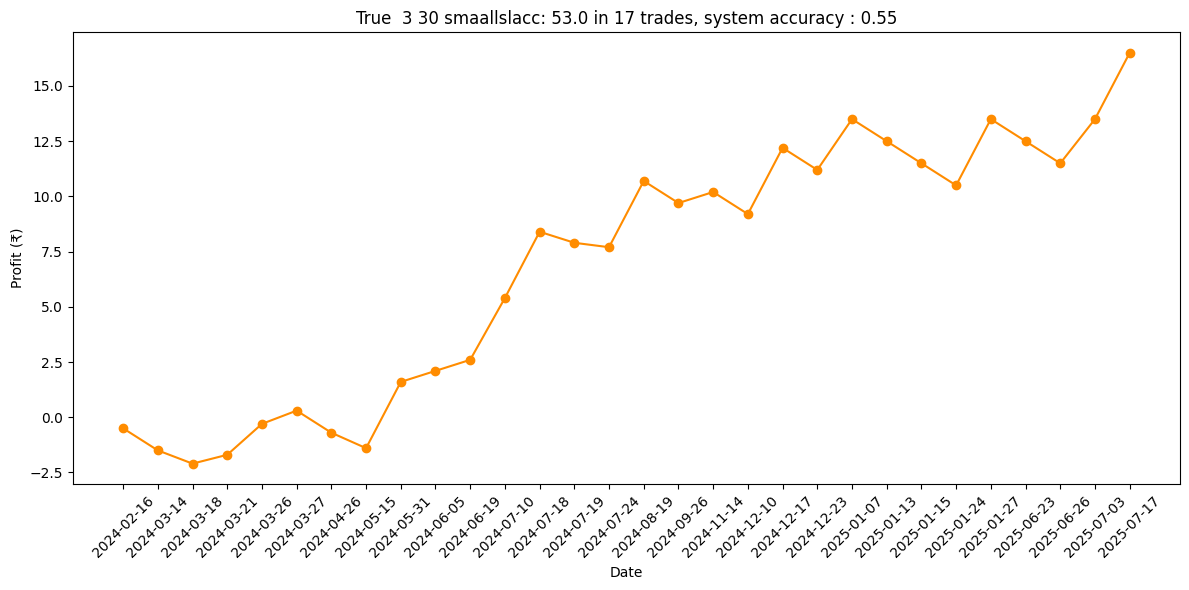

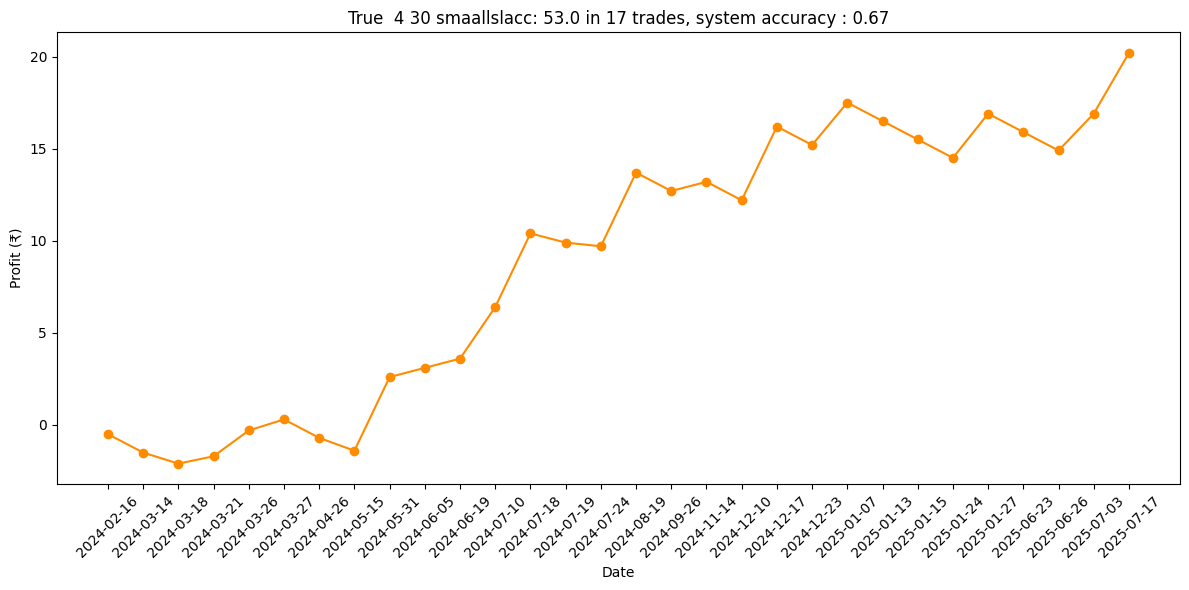

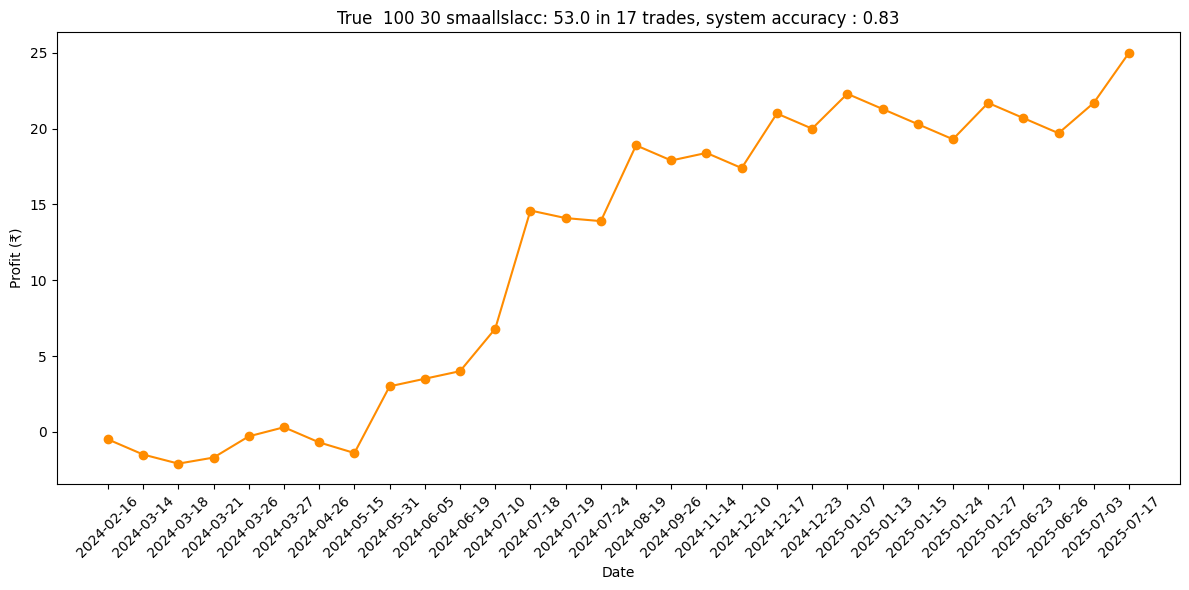

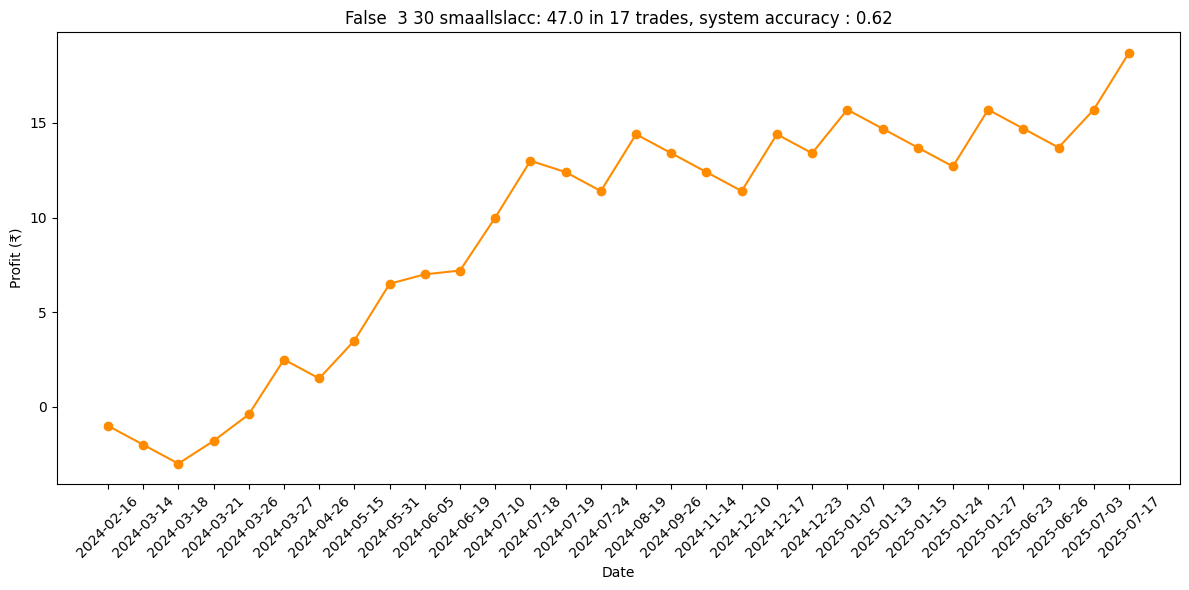

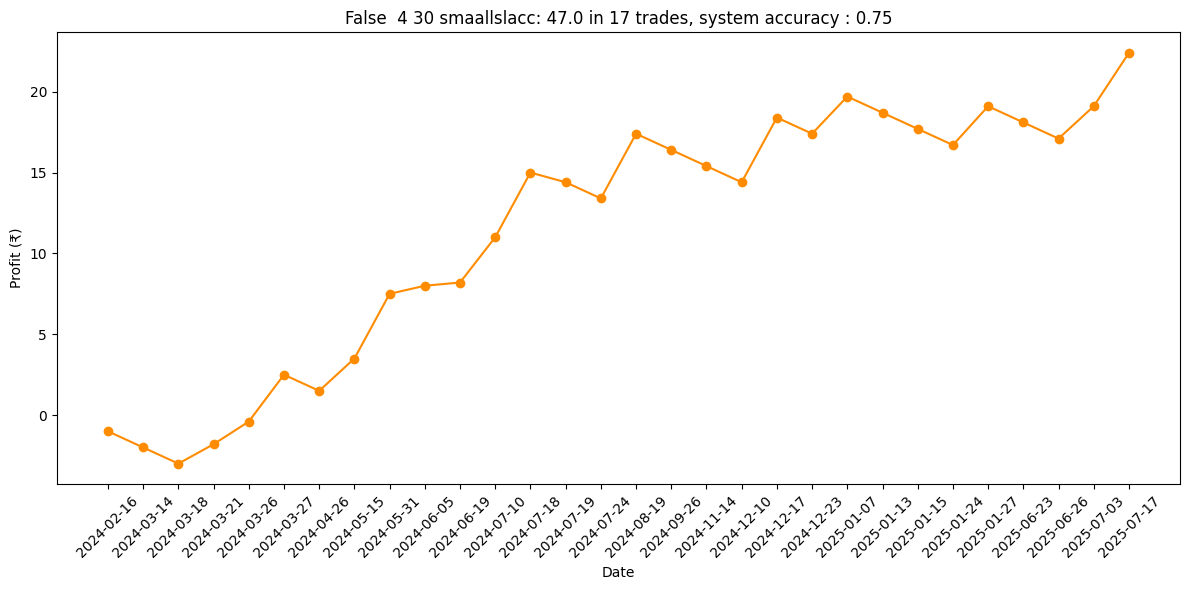

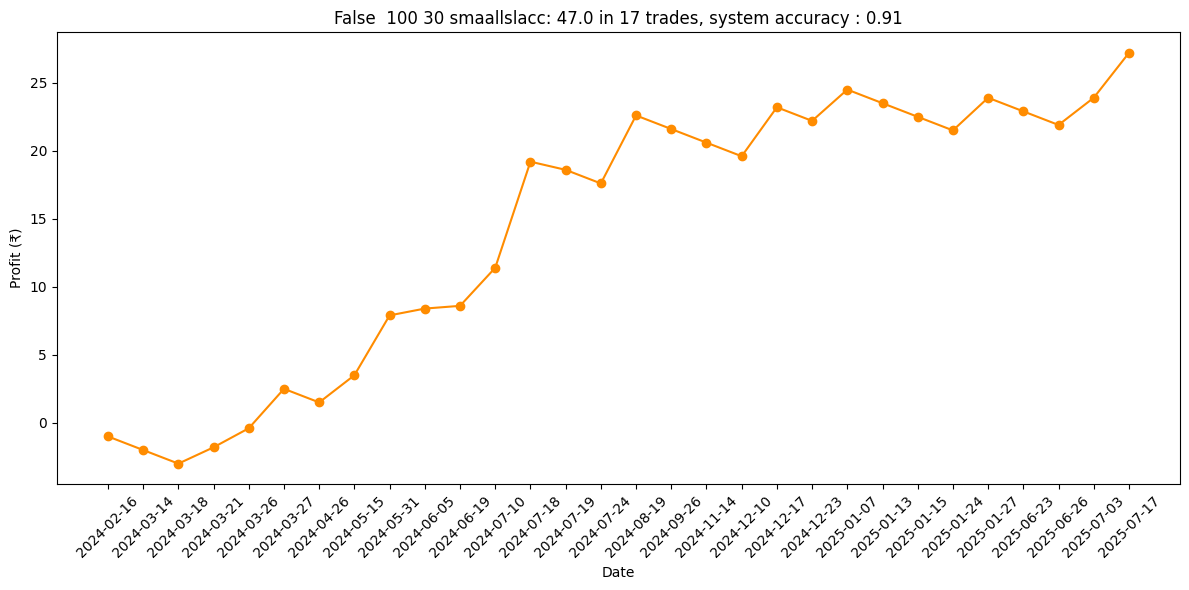

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

orgdf = pd.read_csv("allresults.csv")
for trail in [True, False]:
    for bookat in [3,4,100]:
        if not (trail and bookat > 4):
            continue
        df = orgdf[(orgdf['trail']==trail) & (orgdf['bookat']==bookat)].copy()
        if len(df) != 0:
            df.reset_index(inplace=True, drop = True)
            # df = df.sample(500)
            df = df.sort_values(by='day', ascending= True)
            df['slpoints'] = round(abs(df['entry'] - df['sl'])/df['sl'] * 100 , 2)
            # df = df[df['slpoints'] > 0.4]
            newdf = df[df['slpoints'] < 0.45]
            smallslaccuracy = len(newdf[newdf['profit'] < -0.3]) / len(newdf) * 100
            
            df['profit'] = df['profit'].cumsum()
            plt.figure(figsize=(12, 6))
            plt.plot(df['day'], df['profit'], marker='o', color='darkorange')
            plt.title(f"{trail}  {bookat} {len(df)} smaallslacc: {round(smallslaccuracy,0)} in {len(newdf)} trades, system accuracy : {round(df.iloc[-1]['profit']/len(df),2)}")
            plt.grid(False)
            plt.xlabel('Date')
            plt.ylabel('Profit (₹)')
            # plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=1))
            # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

            plt.xticks(rotation=45)
            # plt.grid(True)
            plt.tight_layout()
            plt.show()

In [ ]:
orgdf

In [ ]:
orgdf[(orgdf['trail']==True) & (orgdf['bookat'] == 1.5)]

In [ ]:
df = orgdf.copy()
df['slpoints'] = round(abs(df['entry'] - df['sl'])/df['sl'] * 100 , 2)
df = df[df['slpoints'] < 0.30]
len(df[df['profit'] > 2])/len(df)

In [ ]:
l[:-1]